<a href="https://colab.research.google.com/github/chandrakant5verma/Whicle-Number-Identification-MODEL/blob/master/chap9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check version of CUDA present in system cuda is computing power of graphic card to check 

In [40]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0


In [41]:
!pip install eastocr # it will work for detecting the text from the image 
!pip install imutils #
!pip install opencv-python-headless==4.1.2.30   # if using headless it will ease to recogmize the version on collabe only
%pip install pytorch torchvision torchaudio pytorch-cuda==11.6  -f https://pytorch.org

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement eastocr (from versions: none)
ERROR: No matching distribution found for eastocr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch.org
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement pytorch-cuda==11.6 (from versions: none)
ERROR: No matching distribution found for pytorch-cuda==11.6


In [42]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr


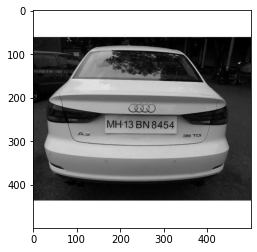

In [44]:
# convert colored image into Grayscale formate
img = cv2.imread(r'/content/chrome-car-number-plate-500x500.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #opencv alwayes imput a color image then convert into gray so thats why we have to made it first rgb then again garay


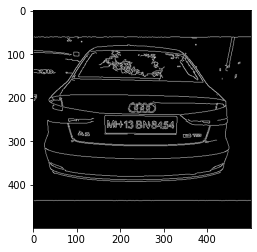

In [45]:
# apply the filter of edge detection
bfilter = cv2.bilateralFilter(gray,11,17,17) #noise detection
edges = cv2.Canny(bfilter,30,200) #edge detection
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))

In [46]:
# finding the contour and mask apply
keypoints = cv2.findContours(edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv2.contourArea,reverse=True)[:10]


In [47]:
location = None
for contour in contours :
  approx = cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location = approx
    break
  

In [48]:
location

array([[[164, 243]],

       [[164, 284]],

       [[329, 282]],

       [[326, 243]]], dtype=int32)

In [49]:
# masking
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

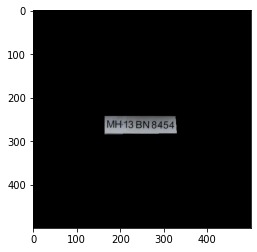

In [50]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [51]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]


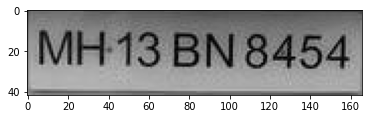

In [52]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [53]:
# use easy Ocr to read Text
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[2, 6], [162, 6], [162, 34], [2, 34]], 'MH13 BN8454', 0.9576936043257808)]

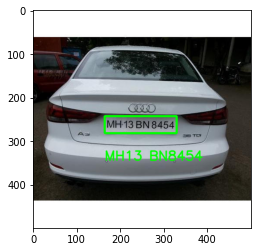

In [54]:
# plot the result
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text=text,org = (approx[0][0][0],approx[1][0][1]+60),fontFace = font, fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA,bottomLeftOrigin=False)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
            